# Analise SQL com python

Vamos começar olhando nossa tabela do dia primerio de abril de 2023.

Por questões de praticidade, salvei os resultados da consulta ao bigquery em arquivos csv estratégicos para economizar recursos. E deixei o código de conexão comentado abaixo para referência. Lembrando que foi necessário adicionar os dados de datario para um projeto particular criado na conta do bigquery.

A saber:<br>
- bq-results.csv, com dados de chamados 1746 do dia 1/4/2023<br>
- eventos_ocupacao.csv, com dados dos eventos do Rio<br>
- chamados_5017.csv, com os dados de chamados 1746 de perturbação ao sossego
- bairro.csv, com a relação de bairros do Rio.




In [80]:
# !pip install basedosdados

In [81]:
# import basedosdados as bd

In [82]:
# # Para carregar o dado direto no pandas
# query = "SELECT * FROM `tutorial-bq-427523.2304101.chamados` LIMIT 5000"
# df = bd.read_sql ( query=query , billing_project_id = "tutorial-bq-427523")

In [83]:
import pandas as pd

In [84]:
df = pd.read_csv('bq-results.csv')
df.head()

,id_chamado,id_origem_ocorrencia,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,...,data_real_diagnostico,tempo_prazo,prazo_unidade,prazo_tipo,dentro_prazo,situacao,tipo_situacao,justificativa_status,reclamacoes,data_particao
0,18517973,13,2023-04-01 18:03:14,2023-05-02 15:22:24,81.0,3.0,25544.0,974.0,247,Ouvidoria COMLURB,...,NaN,NaN,D,F,Fora do prazo,Encerrado,Atendido,NaN,0,2023-04-01
1,18518136,13,2023-04-01 19:15:24,2023-04-03 16:31:06,NaN,NaN,NaN,NaN,121,Ouvidoria GM-RIO,...,NaN,NaN,D,F,No prazo,Encerrado,Atendido parcialmente,NaN,0,2023-04-01
2,18516836,1,2023-04-01 10:34:10,2023-04-03 14:07:40,NaN,NaN,NaN,NaN,835,Ouvidoria SMS/CAP3.1,...,NaN,NaN,D,F,No prazo,Encerrado,Atendido parcialmente,NaN,0,2023-04-01
3,18516688,1,2023-04-01 09:53:57,2023-04-27 16:31:54,NaN,NaN,NaN,NaN,43,Ouvidoria SMTR,...,NaN,NaN,D,F,No prazo,Encerrado,Atendido,NaN,0,2023-04-01
4,18517231,13,2023-04-01 12:45:19,2023-05-02 09:21:23,NaN,NaN,NaN,NaN,846,OUV.SMS/HMSA,...,NaN,NaN,D,F,Fora do prazo,Encerrado,Atendido parcialmente,NaN,0,2023-04-01


In [85]:
df.describe()

,id_chamado,id_origem_ocorrencia,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,id_tipo,id_subtipo,longitude,latitude,tempo_prazo,justificativa_status,reclamacoes
count,1.903000e+03,1903.000000,1772.000000,1772.000000,1772.000000,1649.000000,1903.000000,1903.000000,1903.000000,1293.000000,1293.000000,0.0,0.0,1903.000000
mean,1.851735e+07,7.783500,83.141084,3.258465,77502.972912,863.061856,255.998949,522.527063,2368.641093,-43.326512,-22.910127,NaN,NaN,0.066211
std,6.732908e+02,6.207539,48.657788,1.195140,68001.940386,7156.232999,429.727927,522.074749,1809.550453,0.128381,0.052070,NaN,NaN,0.289727
min,1.851618e+07,1.000000,1.000000,1.000000,42.000000,0.000000,8.000000,1.000000,6.000000,-43.723992,-23.032617,NaN,NaN,0.000000
25%,1.851676e+07,1.000000,35.000000,2.000000,35200.750000,55.000000,70.000000,11.000000,1242.000000,-43.386170,-22.944402,NaN,NaN,0.000000
50%,1.851734e+07,11.000000,80.500000,3.000000,67702.000000,194.000000,118.000000,281.000000,1360.000000,-43.302395,-22.911504,NaN,NaN,0.000000
75%,1.851795e+07,13.000000,131.250000,4.000000,84070.250000,537.000000,169.000000,782.000000,2966.000000,-43.222335,-22.876769,NaN,NaN,0.000000
max,1.851848e+07,18.000000,164.000000,5.000000,600981.000000,271950.000000,1743.000000,1667.000000,5847.000000,-43.160581,-22.789785,NaN,NaN,4.000000


##Análise

###1.Total de chamados distintos no dia

In [86]:
total_chamados = df['id_chamado'].nunique()
total_chamados

1903

###2.Tipo de chamado com mais ocorrências no dia

In [87]:
id_tipo_mais_comum = df['id_tipo'].value_counts().idxmax()
total_mais_comum = df['id_tipo'].value_counts().max()

print(id_tipo_mais_comum)
print(total_mais_comum)

782
373


Para confirmar, vemos se temos o mesmo resultado com a busca pelo id_tipo e tipo:

In [88]:
tipo_mais_comum = df['tipo'].value_counts().idxmax()
total_tipo_mais_comum = df['tipo'].value_counts().max()

print(tipo_mais_comum)
print(total_tipo_mais_comum)

Estacionamento irregular
373


Positivo, então temos que o Estacionamento irregular, código 782, foi o mais comum do dia.

## Vamos usar a tabela de bairros

In [89]:
df_bairros = pd.read_csv('bairro.csv')
df_bairros.head(2)

,id_bairro,nome,id_area_planejamento,id_regiao_planejamento,nome_regiao_planejamento,id_regiao_administrativa,nome_regiao_administrativa,subprefeitura,area,perimetro,geometry_wkt,geometry
0,2,Gamboa,1,1.1,Centro,1,Portuaria,Centro,1.112903e+06,4612.833630,POLYGON ((-43.18791509600138 -22.8931217212322...,"POLYGON((-43.1879150960014 -22.8931217212322, ..."
1,1,Saúde,1,1.1,Centro,1,Portuaria,Centro,3.638176e+05,2646.220568,POLYGON ((-43.181151633502964 -22.895430284304...,"POLYGON((-43.181151633503 -22.8954302843042, -..."


## 3 Bairros com mais chamados

In [90]:
df = pd.read_csv('bq-results.csv')
df = df.merge(df_bairros[['id_bairro', 'nome']], on='id_bairro', how='left')
bairros_top3 = df['nome'].value_counts().head(3)
bairros_top3

,count
nome,
Campo Grande,124
Tijuca,96
Barra da Tijuca,60


## 4 Subprefeitura com mais chamados

Aqui vemos que a subprefeitura com mais chamados é a Zona Norte.

In [91]:
dfsub = pd.read_csv('bq-results.csv')
dfsub = dfsub.merge(df_bairros[['id_bairro', 'subprefeitura']], on='id_bairro', how='left')
subprefeitura_top = dfsub['subprefeitura'].value_counts().head(3)
subprefeitura_top

,count
subprefeitura,
Zona Norte,534
Zona Oeste,259
Zona Sul,239


## 5 Chamados sem associação (id_bairro ou id_territorialidade nulos)

In [92]:
sem_associacao = df[df['id_bairro'].isnull() | df['id_territorialidade'].isnull()].shape[0]
print(sem_associacao)

131


## Vamos usar a tabela de ocupação dos eventos e de casos de chamados 5017

In [93]:
eventos_df = pd.read_csv('eventos_ocupacao.csv')
eventos_df.head(8)

,ano,data_inicial,data_final,evento,taxa_ocupacao
0,10/02 a 14/02/2024,2024-02-10,2024-02-14,Carnaval,NaN
1,18/02 a 21/02 de 2023,2023-02-18,2023-02-21,Carnaval,0.9554
2,02/09 a 04/09 de 2022,2022-09-02,2022-09-04,Rock in Rio,0.8184
3,13/09 a 15/09 / 19/09 a 22/09 de 2024,NaN,NaN,Rock in Rio,NaN
4,08/09 a 11/09 de 2022,2022-09-08,2022-09-11,Rock in Rio,0.9451
5,30-31/12 e 01/01 (2023-2024),2023-12-30,2024-01-01,Réveillon,NaN
6,30-31/12 e 01/01 (2022-2023),2022-12-30,2023-01-01,Réveillon,0.9251
7,29-31/12 e 01/01 (2024-2025),NaN,NaN,Réveillon,NaN


In [94]:
chamados_df = pd.read_csv('chamados_5017.csv', low_memory=False)
chamados_df.head()

,id_chamado,id_origem_ocorrencia,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,...,data_real_diagnostico,tempo_prazo,prazo_unidade,prazo_tipo,dentro_prazo,situacao,tipo_situacao,justificativa_status,reclamacoes,data_particao
0,18071838,13,2022-12-28 22:11:51,2023-01-12 16:04:42,144.0,5.0,110155.0,15.0,121,Ouvidoria GM-RIO,...,NaN,NaN,D,F,No prazo,Encerrado,Atendido parcialmente,NaN,0,2022-12-01
1,18009154,13,2022-12-11 22:05:16,2022-12-12 14:54:37,64.0,3.0,81034.0,232.0,121,Ouvidoria GM-RIO,...,NaN,NaN,D,F,No prazo,Encerrado,Atendido parcialmente,NaN,0,2022-12-01
2,18048716,13,2022-12-21 17:20:18,2022-12-22 10:10:23,5.0,1.0,62331.0,101.0,121,Ouvidoria GM-RIO,...,NaN,NaN,D,F,No prazo,Encerrado,Atendido parcialmente,NaN,0,2022-12-01
3,18050264,1,2022-12-22 09:32:06,2022-12-22 10:41:25,52.0,3.0,69815.0,0.0,121,Ouvidoria GM-RIO,...,NaN,NaN,D,F,No prazo,Encerrado,Atendido parcialmente,NaN,0,2022-12-01
4,18010925,13,2022-12-12 11:15:53,2022-12-12 11:25:27,73.0,3.0,12443.0,472.0,121,Ouvidoria GM-RIO,...,NaN,NaN,D,F,No prazo,Encerrado,Atendido parcialmente,NaN,0,2022-12-01


## 6 Contar chamados com id_subtipo == 5071 (dentro do período total)

In [95]:
# Converter colunas de data
chamados_df["data_inicio"] = pd.to_datetime(chamados_df["data_inicio"])
chamados_df["data_particao"] = pd.to_datetime(chamados_df["data_particao"])
eventos_df["data_inicial"] = pd.to_datetime(eventos_df["data_inicial"], errors="coerce")
eventos_df["data_final"] = pd.to_datetime(eventos_df["data_final"], errors="coerce")


chamados_filtrados = chamados_df[
    (chamados_df["id_subtipo"] == 5071) &
    (chamados_df["data_particao"].between("2022-01-01", "2024-12-31"))
]
q6_total_chamados = len(chamados_filtrados)
print("Q6 - Total chamados:", q6_total_chamados)

Q6 - Total chamados: 56785


## 7 e 8 Chamados em eventos (Rock in Rio, Réveillon, Carnava)

In [96]:
# Filtrar eventos oficiais válidos
eventos_oficiais = eventos_df[
    eventos_df["evento"].isin(['Reveillon', 'Réveillon', 'Carnaval', 'Rock in Rio'])
].dropna(subset=["data_inicial", "data_final"])

# Criar eventos manuais
eventos_manuais = pd.DataFrame({
    "evento": ["Rock in Rio", "Rock in Rio", "Réveillon"],
    "data_inicial": [pd.Timestamp("2024-09-13"), pd.Timestamp("2024-09-19"), pd.Timestamp("2024-12-29")],
    "data_final": [pd.Timestamp("2024-09-15"), pd.Timestamp("2024-09-22"), pd.Timestamp("2025-01-01")]
})

# Combinar todos os eventos
eventos_todos = pd.concat([eventos_manuais, eventos_oficiais], ignore_index=True)

# Associar chamados com eventos
chamados_eventos = []
for _, row in eventos_todos.iterrows():
    filtrados = chamados_filtrados[
        (chamados_filtrados["data_inicio"].dt.date >= row["data_inicial"].date()) &
        (chamados_filtrados["data_inicio"].dt.date <= row["data_final"].date())
    ].copy()
    filtrados["evento"] = row["evento"]
    chamados_eventos.append(filtrados)

chamados_eventos_df = pd.concat(chamados_eventos, ignore_index=True)

q7_contagem_eventos = chamados_eventos_df.groupby("evento").size().reset_index(name="total_chamados")
q7_contagem_eventos.set_index("evento", inplace=True)
q7_contagem_eventos

,total_chamados
evento,
Carnaval,252
Rock in Rio,946
Réveillon,280


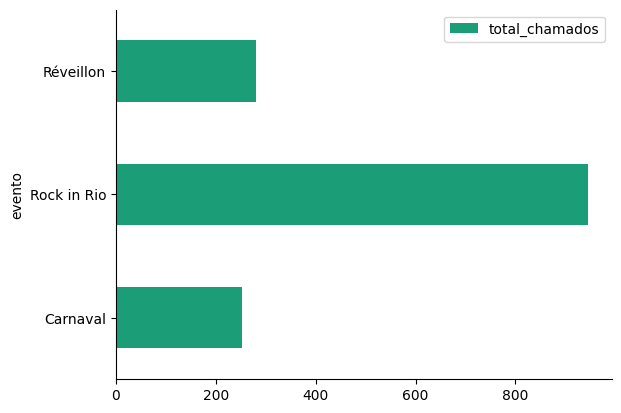

In [97]:
from matplotlib import pyplot as plt
import seaborn as sns
q7_contagem_eventos.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Média diária de chamados por evento

In [98]:
# Verificar blocos individuais com chamados e calcular média diária
blocos_validos = []
for _, row in eventos_todos.iterrows():
    chamados_no_bloco = chamados_filtrados[
        (chamados_filtrados["data_inicio"].dt.date >= row["data_inicial"].date()) &
        (chamados_filtrados["data_inicio"].dt.date <= row["data_final"].date())
    ]
    total = len(chamados_no_bloco)
    dias = (row["data_final"] - row["data_inicial"]).days + 1
    if total > 0 and dias > 0:
        blocos_validos.append({
            "evento": row["evento"],
            "data_inicial": row["data_inicial"],
            "data_final": row["data_final"],
            "total_chamados": total,
            "dias": dias,
            "media_diaria": total / dias
        })

# Converter para DataFrame e buscar o bloco com maior média diária
df_blocos = pd.DataFrame(blocos_validos)
q9_maior_bloco = df_blocos.sort_values(by="media_diaria", ascending=False)
# Exibir o resultado
q9_maior_bloco

,evento,data_inicial,data_final,total_chamados,dias,media_diaria
3,Rock in Rio,2022-09-08,2022-09-11,550,4,137.50
2,Rock in Rio,2022-09-02,2022-09-04,396,3,132.00
1,Carnaval,2023-02-18,2023-02-21,252,4,63.00
4,Réveillon,2022-12-30,2023-01-01,147,3,49.00
0,Réveillon,2024-12-29,2025-01-01,133,4,33.25


## 9 e 10 Média geral de chamados por dia e por evento

Vemos que o evento com maior média diária dos chamados é o Rock in Rio.

In [99]:
dias_total = (pd.Timestamp("2024-12-31") - pd.Timestamp("2022-01-01")).days + 1
q10_media_diaria_geral = len(chamados_filtrados) / dias_total
print("Q10 - Média diária geral:", q10_media_diaria_geral)

Q10 - Média diária geral: 51.81113138686131


In [100]:
eventos_com_chamados = []
for _, row in eventos_todos.iterrows():
    chamados_no_evento = chamados_filtrados[
        (chamados_filtrados["data_inicio"].dt.date >= row["data_inicial"].date()) &
        (chamados_filtrados["data_inicio"].dt.date <= row["data_final"].date())
    ]
    total = len(chamados_no_evento)
    if total > 0:
        dias = (row["data_final"] - row["data_inicial"]).days + 1
        media = total / dias
        eventos_com_chamados.append({
            "evento": row["evento"],
            "total_chamados": total,
            "dias": dias,
            "media_diaria": media
        })

# Criar DataFrame final com as médias
medias_eventos_df = pd.DataFrame(eventos_com_chamados)

# Agrupar por evento somando os chamados e dias
agrupado = medias_eventos_df.groupby("evento").agg({
    "total_chamados": "sum",
    "dias": "sum"
}).reset_index()
agrupado["media_diaria"] = agrupado["total_chamados"] / agrupado["dias"]

# Obter o evento com maior média
q9_maior_media_evento_corrigido = agrupado.sort_values(by="media_diaria", ascending=False)
q9_maior_media_evento_corrigido.set_index("evento", inplace=True)
q9_maior_media_evento_corrigido

,total_chamados,dias,media_diaria
evento,,,
Rock in Rio,946,7,135.142857
Carnaval,252,4,63.000000
Réveillon,280,7,40.000000


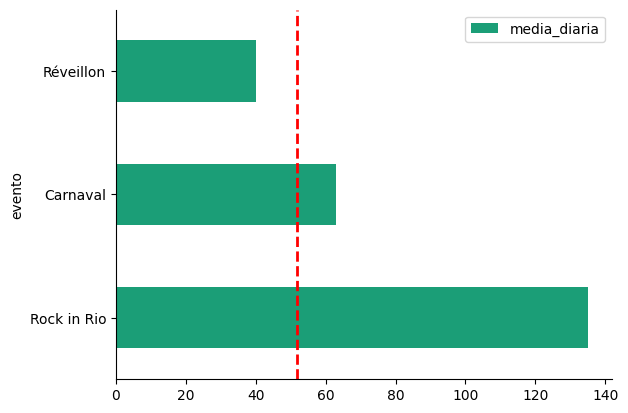

In [101]:
q9_maior_media_evento_corrigido[['media_diaria']].plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.axvline(q10_media_diaria_geral, color='red', linestyle='--', linewidth=2, label='Média corriqueira')
plt.gca().spines[['top', 'right',]].set_visible(False)
#

## 11 Extras e Ideias

### Chamados no tempo
Importante para Explorar Tendências e Sazonalidades

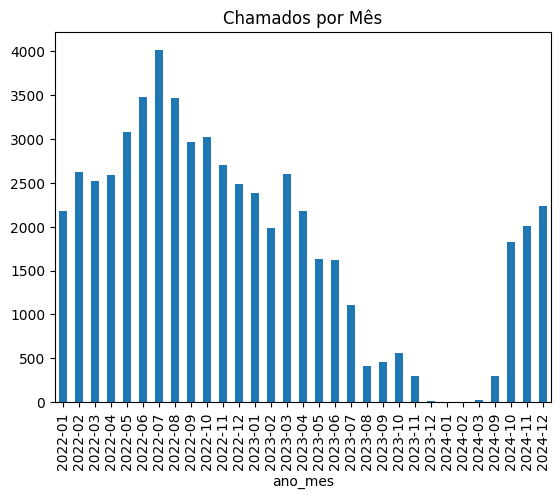

In [125]:
def chamados_por_mes(df, title='Chamados por Mês'):
  df['data_inicio'] = pd.to_datetime(df['data_inicio'])
  df['ano_mes'] = df['data_inicio'].dt.to_period('M')
  df['ano_mes'].value_counts().sort_index().plot(kind='bar', title=title)

chamados_por_mes(chamados_df)

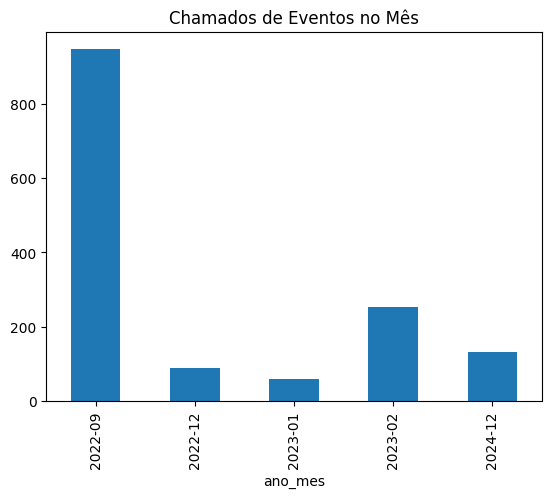

In [127]:
chamados_por_mes(chamados_eventos_df,title='Chamados de Eventos no Mês')

### Mapa de Calor de Chamados por Bairro
Como veremos, esta opção nos dá uma visão de como áreas vizinhas se relacionam aos chamados

#### Código para o mapa

In [131]:
from shapely import wkt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

def show_map_bairro(df_bairros,df_chamados, title='Mapa de Calor de Chamados por Bairro'):
  # Converter a geometria de WKT para objetos geométricos
  df_bairros['geometry'] = df_bairros['geometry_wkt'].apply(wkt.loads)

  # Criar o GeoDataFrame
  gdf_bairros = gpd.GeoDataFrame(df_bairros, geometry='geometry', crs='EPSG:4326')

  # Carregar os chamados e garantir que id_bairro é str

  # Normalização robusta
  # Remover chamados sem id_bairro
  df_chamados = df_chamados.dropna(subset=['id_bairro']).copy()
  df_chamados['id_bairro'] = df_chamados['id_bairro'].astype(int).astype(str)
  gdf_bairros['id_bairro'] = gdf_bairros['id_bairro'].astype(int).astype(str)


  # Contar chamados por bairro
  chamados_por_bairro = df_chamados.groupby('id_bairro').size().reset_index(name='num_chamados')

  # Merge com a geometria
  gdf_mapa = gdf_bairros.merge(chamados_por_bairro, on='id_bairro', how='left')
  gdf_mapa['num_chamados'] = gdf_mapa['num_chamados'].fillna(0)

  # sPlotar
  fig, ax = plt.subplots(figsize=(12, 10))
  gdf_mapa.plot(
      column='num_chamados',
      cmap='OrRd',
      linewidth=0.5,
      edgecolor='gray',
      legend=True,
      ax=ax
  )
  ax.set_title(title, fontsize=16)
  ax.axis('off')
  plt.show()
  #

#### Uso do mapa

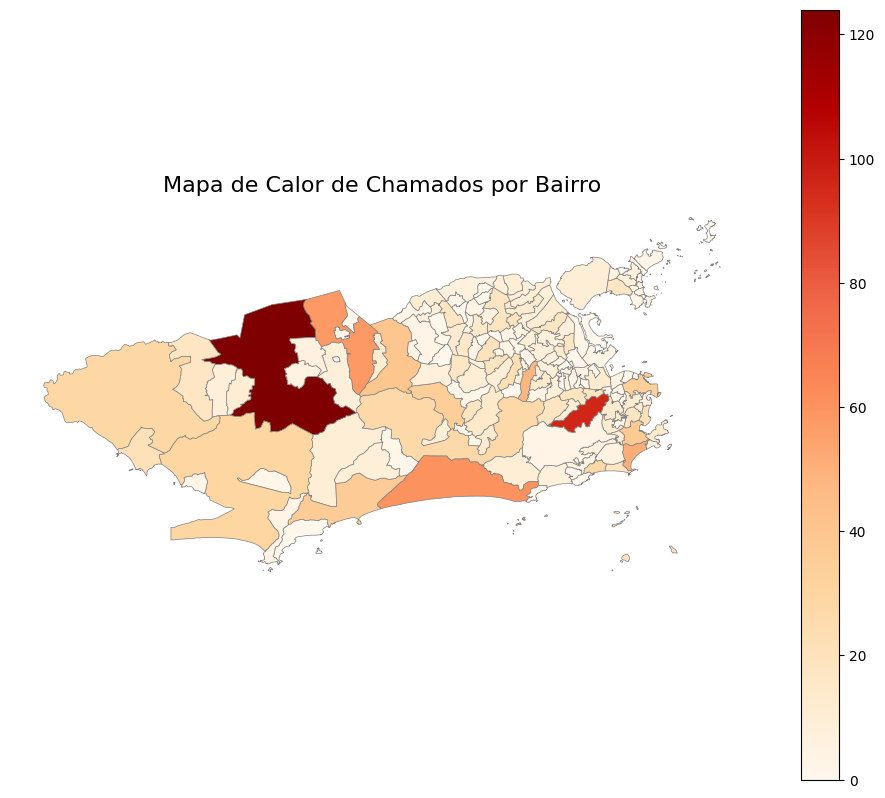

In [132]:

# Carregar o CSV
df_bairros = pd.read_csv('bairro.csv')
df_chamados230401 = pd.read_csv('bq-results.csv')
show_map_bairro(df_bairros,df_chamados230401)
#

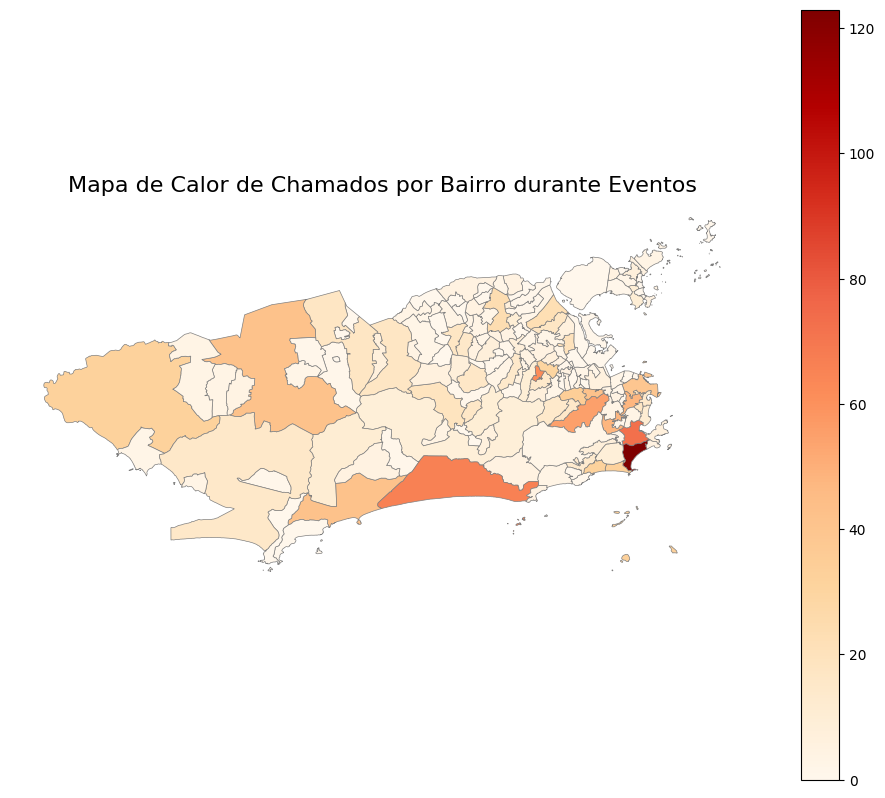

In [133]:
show_map_bairro(df_bairros,chamados_eventos_df,'Mapa de Calor de Chamados por Bairro durante Eventos')

Daqui já decorre uma mudança clara de comportamento durante os eventos. O perfil dos bairros com chamados migra.

Inclusive, poderiamos também fazer a diferença entre dia de evento e media fora do evento para observar os que mais mudam.

Podemos também notar que embora os eventos expliquem mais pessoas e portanto mais chamados na zona dos eventos, eles não implicariam necessariamente redução de outras áreas, mas na prática observamos isso. Mostrando que ouve realmente uma "migração" dos chamados.

### Comparando Subprefeituras

A ideia é voltada para novamente nos dar a liberdade de variar o dataframe e passar diferentes recortes, aqui foco em mostrar o contraste de aumento das ocorrências, entre um dia tipico e dia de evento.

O Código deste trecho é baseado na questão.

In [141]:
def show_chamados_por_subprefeitura(df, title='Chamados por Subprefeitura'):
    dfsub = df.merge(df_bairros[['id_bairro', 'subprefeitura']], on='id_bairro', how='left')

    ax = dfsub['subprefeitura'].value_counts().plot(kind='barh')

    # Estilização
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel('Número de Chamados')
    ax.set_ylabel('Subprefeitura')
    plt.title(title)

    plt.tight_layout()
    plt.show()

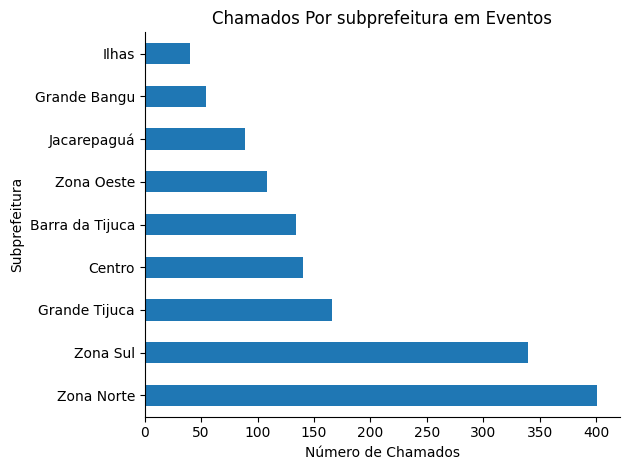

In [143]:
show_chamados_por_subprefeitura(chamados_eventos_df, title='Chamados Por subprefeitura em Eventos')

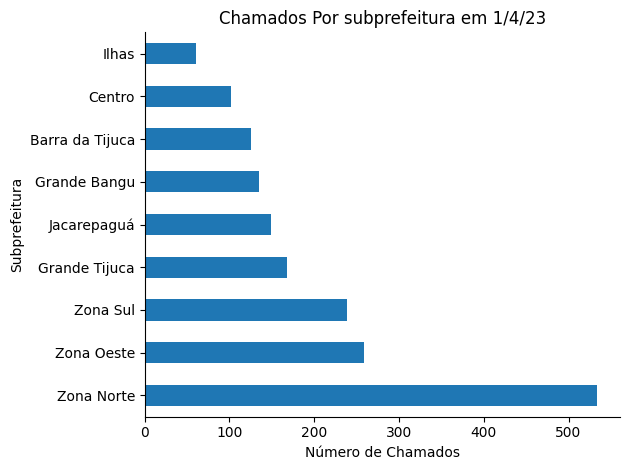

In [144]:
show_chamados_por_subprefeitura(df_chamados230401, title='Chamados Por subprefeitura em 1/4/23')